# Második kisZH - gyakorló feladatok

Az alábbi feladatok a második kisZH-ra való gyakorlás céljából készültek. A kisZH-n ilyen jellegű kérdésekre lehet számítani, az alább érintett, illetve az első kisZH utáni, a 8. gyakorlat bezárultáig tartó gyakorlatok és előadások témaköreiből.

Törekedjenek azonban arra, hogy az értékelendő válaszukat, és az ahhoz vezető gondolatmenetet egyértelműen jelöljék, csakúgy mint az erre felhasznált kódokat. Ha valamiről nem óhajtják, hogy értékeljük (vázlatok), azt kérem külön emeljék ki.

## 1. feladat
Az alábbi kód lefuttatásával kap egy $G$ irányított, élsúlyozott gráfot.

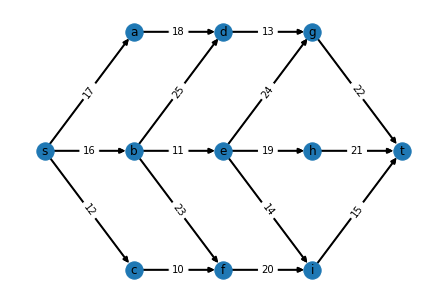

In [1]:
exec(open("SampleGraph.py").read())
G = SampleGraph("shp")

Az élsúlyok jelöljék a két csúcs közötti egyirányú kapcsolat hosszát.

a) A legrövidebb $s \to t$ út által nem használt élek közül a leghosszabb élen mennyit kéne rövidíteni, hogy a legrövidebb út része legyen?

b) Ha a hálózat egy projektháló lenne, akkor merre haladna a kritikus út?

c) Mi a legrövidebb s-t séta a d csúcson keresztül?
<br>*Megjegyzés:* a séta egy olyan 'út' (avagy váltakozó csúcs-él sorozat), melyben egy csúcs akár többször is előfordulhat.

## Megoldás:

In [2]:
# a) megoldás: a legrövidebb út
import networkx as nx
hossz, rovid_ut = nx.single_source_dijkstra(G, 's', 't')
print('A legrövidebb út:', rovid_ut)
print('A legrövidebb út hossza: ', hossz)

A legrövidebb út: ['s', 'b', 'e', 'i', 't']
A legrövidebb út hossza:  56


In [3]:
# b-d él a leghosszabb 25-tel (nem része a legrövidebb útnak)
from pulp import *

rovidut_LP = pulp.LpProblem('Legrövidebb_út', LpMaximize)

csucsok = list(G.nodes())

x = LpVariable.dicts('x',csucsok,lowBound=0, cat="Continuous")

rovidut_LP += x['b'] - x['d']

elek = list(G.edges())

for i in range(len(elek)):
    rovidut_LP += x[elek[i][1]] - x[elek[i][0]] <= G[elek[i][0]][elek[i][1]]['weight']

# a legrövidebb út mentén rögzítjük a távolságokat:
rovidut_LP += x['b'] - x['s'] == G['s']['b']['weight']
rovidut_LP += x['e'] - x['b'] == G['b']['e']['weight']
rovidut_LP += x['i'] - x['e'] == G['e']['i']['weight']
rovidut_LP += x['t'] - x['i'] == G['i']['t']['weight']

rovidut_LP += x['s'] == 0

megoldas = rovidut_LP.solve()

print(LpStatus[megoldas])
print('b és d távolsága legfeljebb, hogy része legyen a legrövidebb útnak:', -value(rovidut_LP.objective))

Optimal
b és d távolsága legfeljebb, hogy része legyen a legrövidebb útnak: 5.0


In [4]:
# b) megoldás:
nx.dag_longest_path(G, weight="weight")

['s', 'b', 'd', 'g', 't']

A kritikus út az $s-b-d-g-t$ útvonalon halad.

In [5]:
# c) megoldás: összeillesztünk egy s-d és egy d-t legrövidebb utat.
hossz, rovid_ut = nx.single_source_dijkstra(G, 's', 'd')
print('A legrövidebb út:', rovid_ut)
print('A legrövidebb út hossza: ', hossz)

A legrövidebb út: ['s', 'a', 'd']
A legrövidebb út hossza:  35


In [6]:
hossz, rovid_ut = nx.single_source_dijkstra(G, 'd', 't')
print('A legrövidebb út:', rovid_ut)
print('A legrövidebb út hossza: ', hossz)

A legrövidebb út: ['d', 'g', 't']
A legrövidebb út hossza:  35


Tehát egy legrövidebb $s-t$ séta (jelen esetben egy út) a $d$ csúcson keresztül az $s-a-d-g-t$, a teljes hossza 70.

## 2. feladat
Az alábbi kód lefuttatásával kap egy $H$ irányított, élsúlyozott gráfot.

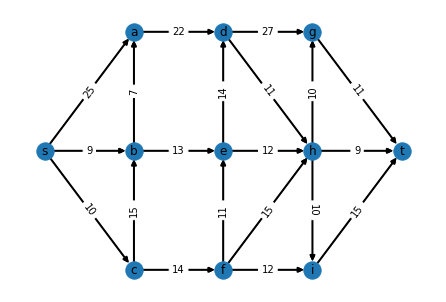

In [7]:
H = SampleGraph("maxflow")

a) Adjon meg egy maximális $s$-ből $t$-be menő folyamot a $H$ gráfban: adja meg a maximális folyam össz. értékét, illetve a folyamértékeket az egyes éleken! Határozzon meg hozzá egy minimális vágást. Melyek a vágásélek?

b) Írja fel a feladat LP modelljét (nem pulp implementációt, hanem a lineáris programozás feladatot)!

c) Hogyan változna a b)-beli LP feladat, ha
<br>i) amennyiben megy folyam a $(c,b)$ élen, akkor nem mehet az $(e,h)$ élen,
<br>ii) illetve az $(a,d), (f,e), (h,i)$ élek közül legalább két darabon legalább 4-es folyamnak kell mennie.

Adja meg a két esetben külön-külön, hogy milyen új változók vagy korlátok segítségével lehet az előírást megvalósítani (illetve jelölje azt is, ha az LP b) pontban megadott elemei változnának)!

## Megoldás:

In [8]:
# a) megoldás:
flow_value, flow_dict = nx.maximum_flow(H, 's', 't', capacity="weight")
elek = list(H.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x('s', 'a') = 22
x('s', 'b') = 8
x('s', 'c') = 5
x('a', 'd') = 22
x('b', 'e') = 8
x('b', 'a') = 0
x('c', 'f') = 5
x('c', 'b') = 0
x('d', 'g') = 11
x('d', 'h') = 11
x('e', 'h') = 8
x('e', 'd') = 0
x('f', 'i') = 5
x('f', 'e') = 0
x('f', 'h') = 0
x('g', 't') = 11
x('h', 't') = 9
x('h', 'g') = 0
x('h', 'i') = 10
x('i', 't') = 15
Maximális folyam össz. értéke: 35


In [9]:
cut_value, partition = nx.minimum_cut(H, 's', 't', capacity="weight")
reachable, non_reachable = partition
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {'a', 'b', 'e', 'i', 'h', 's', 'd', 'c', 'f', 'g'}
W'= {'t'}
Minimális vágás értéke: 35


Tehát a vágásélek a $(g,t), (h,t), (i,t)$.

*b) megoldás:*
Jelölje $x_{ij}$ változó az $i$ csúcsból a $j$ csúcsba menő folyam értékét.
$$
\begin{array}{rccc}
\max & x_{sa} + x_{sb} + x_{sc} & & \\
\text{f.h.} & x_{sa}  & \leq & 25 \\
& x_{sb}  & \leq & 9 \\
& x_{sc}  & \leq & 10 \\
& x_{ad}  & \leq & 22 \\
& x_{ba}  & \leq & 7 \\
& x_{be}  & \leq & 13 \\
& x_{cb}  & \leq & 15 \\
& x_{cf}  & \leq & 14 \\
& x_{dg}  & \leq & 27 \\
& x_{dh}  & \leq & 11 \\
& x_{ed}  & \leq & 14 \\
& x_{eh}  & \leq & 12 \\
& x_{fe}  & \leq & 11 \\
& x_{fh}  & \leq & 15 \\
& x_{fi}  & \leq & 12 \\
& x_{gt}  & \leq & 11 \\
& x_{hg}  & \leq & 10 \\
& x_{hi}  & \leq & 10 \\
& x_{ht}  & \leq & 9 \\
& x_{it}  & \leq & 15 \\
& x_{sa} + x_{ba} - x_{ad} & = & 0 \\
& x_{sb} - x_{ba} - x_{be} & = & 0 \\
& x_{sc} - x_{cb} - x_{cf} & = & 0 \\
& x_{ad} + x_{ed} - x_{dg} - x_{dh} & = & 0 \\
& x_{be} + x_{fe} - x_{ed} - x_{eh} & = & 0 \\
& x_{cf} - x_{fe} - x_{fh} - x_{fi} & = & 0 \\
& x_{dg} + x_{hg} - x_{gt} & = & 0 \\
& x_{dh} + x_{eh} + x_{fh} - x_{hg} - x_{hi} - x_{ht} & = & 0 \\
& x_{fi} + x_{hi} - x_{it} & = & 0 \\
& x_{sa}, x_{sb}, x_{sc}, x_{ad}, x_{be}, x_{ba}, x_{cf}, x_{cb}, x_{dg}, x_{dh} & \geq & 0 \\
& x_{eh}, x_{ed}, x_{fi}, x_{fe}, x_{fh}, x_{gt}, x_{hg}, x_{hi}, x_{ht}, x_{it} & \geq & 0
\end{array}
$$

*c) megoldás:*
<br>i) Legyen $u$ bináris változó, melyre $u=1$ ha $x_{cb} > 0$. Ekkor a b)-beli modellhez adjuk hozzá a következő két korlátot:

$$
\begin{array}{ccc}
x_{cb} & \leq & M_1u \\
x_{eh} & \leq & M_2(1-u)
\end{array}
$$

ahol $M_1 \geq 15$ (legalább a $(c,b)$ él kapacitása) és $M_2 \geq 12$ (legalább az $(e,h)$ él kapacitása).

ii) Legyen $y_1, y_2$ és $y_3$ bináris változók, melyekre $y_1 = 1$, ha $x_{ad} \geq 4$; $y_2 = 1$, ha $x_{fe} \geq 4$; $y_3 = 1$, ha $x_{hi} \geq 4$. Ekkor a b)-beli modellhez adjuk hozzá a következő négy korlátot:

$$
\begin{array}{ccc}
x_{ad} & \geq & 4y_1 \\
x_{fe} & \geq & 4y_2 \\
x_{hi} & \geq & 4y_3 \\
y_1 + y_2 + y_3 & \geq & 2
\end{array}
$$